In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the semi-circumference
radius = 1
num_points = 90

# Specify lower and upper angles in degrees
lower_angle_deg = 0  # e.g., 20 degrees
upper_angle_deg = 180  # e.g., 60 degrees

# Convert the specified angles to radians
lower_angle_rad = np.radians(lower_angle_deg)
upper_angle_rad = np.radians(upper_angle_deg)


Angles


In [11]:
# Generate angles for the upper semi-circumference (from 0 to π)
#angles = np.linspace(np.deg2rad(lower_angle_deg), np.deg2rad(upper_angle_deg), num_points)

# Generate random angles
#random_indices = np.random.choice(180, size=num_points, replace=False)  # No duplicates
#random_indices.sort()
#angles = random_indices * (np.pi / 180)

# Read angles from npz
npz_file = '../data/battery/3_clear/npz/projs_angles_90_random_projs.npz'
npz = np.load(npz_file)
angles = npz['angles']

# Calculate x and y coordinates for the points on the semi-circumference
x = radius * np.cos(angles)
y = radius * np.sin(angles)

Plotting

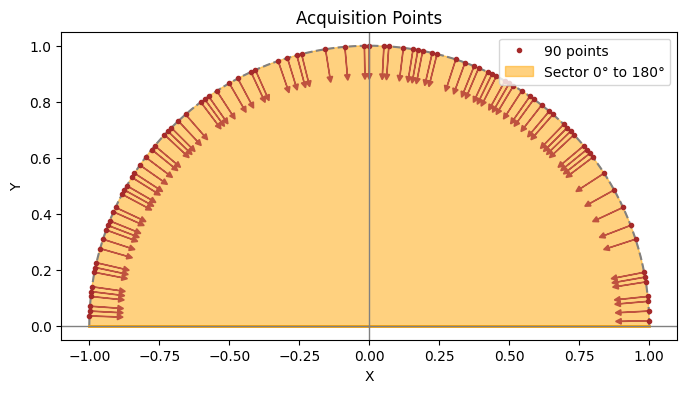

In [12]:
# Calculate whole circumference
angles_circ = np.linspace(0, np.pi, num_points)
x_circ = radius * np.cos(angles_circ)
y_circ = radius * np.sin(angles_circ)

# Plot the semi-circumference
plt.figure(figsize=(8, 4))
plt.plot(x_circ, y_circ, linestyle='--', color='gray')
plt.plot(x, y, 'o', color='brown', markersize=3, label=f'{num_points} points')

for i in range(num_points):
    plt.arrow(x[i], y[i], -x[i] * 0.1, -y[i] * 0.1, 
              head_width=0.02, head_length=0.02, color='purple')

# Create the sector coordinates to fill the area between lower and upper angles
sector_angles = np.linspace(lower_angle_rad, upper_angle_rad, num_points)
sector_x = np.concatenate(([0], radius * np.cos(sector_angles), [0]))
sector_y = np.concatenate(([0], radius * np.sin(sector_angles), [0]))

# Fill the sector area between the lower and upper angles
plt.fill(sector_x, sector_y, color='orange', alpha=0.5, label=f'Sector {lower_angle_deg}° to {upper_angle_deg}°')

# Add lines indicating the lower and upper angles
plt.plot([0, radius * np.cos(lower_angle_rad)], [0, radius * np.sin(lower_angle_rad)], 'orange', lw=2)
plt.plot([0, radius * np.cos(upper_angle_rad)], [0, radius * np.sin(upper_angle_rad)], 'orange', lw=2)

# Customize the plot
plt.axhline(0, color='grey', lw=1)  # x-axis
plt.axvline(0, color='grey', lw=1)  # y-axis
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Acquisition Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')

# Show the plot
plt.show()
